In [1]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [2]:
train_data = data[:124]
train_target = target[:124]

test_data = data[124:]
test_target = target[124:]

In [3]:
print(train_target.shape)
print(test_target.shape)

(124, 1)
(1331, 1)


ValueError: x and y must have same first dimension, but have shapes (212,) and (1331, 1)

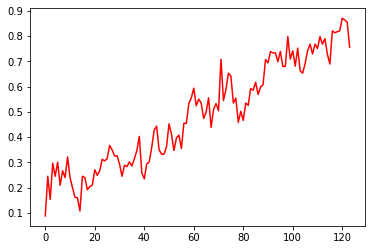

In [4]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1200,1412,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('temp Value/c')
plt.show()

In [5]:
print(data.shape)

(1455, 7, 1)


In [6]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 96)             37632     
_________________________________________________________________
dropout (Dropout)            (None, 7, 96)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 96)             74112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 96)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 96)             74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 96)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [7]:
history = model.fit(train_data,train_target,epochs=70,validation_split=0.1) 

Epoch 1/70
4/4 [==============================] - 5s 437ms/step - loss: 0.2155 - val_loss: 0.3784
Epoch 2/70
4/4 [==============================] - 0s 31ms/step - loss: 0.0977 - val_loss: 0.0164
Epoch 3/70
4/4 [==============================] - 0s 38ms/step - loss: 0.0311 - val_loss: 0.0029
Epoch 4/70
4/4 [==============================] - 0s 31ms/step - loss: 0.0190 - val_loss: 0.0891
Epoch 5/70
4/4 [==============================] - 0s 25ms/step - loss: 0.0252 - val_loss: 0.1091
Epoch 6/70
4/4 [==============================] - 0s 30ms/step - loss: 0.0240 - val_loss: 0.0432
Epoch 7/70
4/4 [==============================] - 0s 23ms/step - loss: 0.0141 - val_loss: 0.0082
Epoch 8/70
4/4 [==============================] - 0s 27ms/step - loss: 0.0188 - val_loss: 0.0146
Epoch 9/70
4/4 [==============================] - 0s 27ms/step - loss: 0.0123 - val_loss: 0.0447
Epoch 10/70
4/4 [==============================] - 0s 51ms/step - loss: 0.0163 - val_loss: 0.0349
Epoch 11/70
4/4 [===========

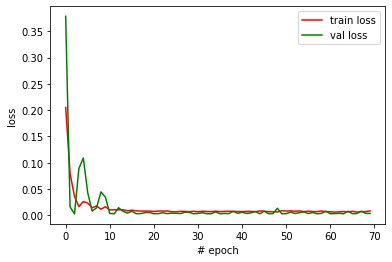

In [8]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
predicted_results=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,predicted_results)
print('r2 score:',r2)

r2 score: 0.8814536057281085


ValueError: x and y must have same first dimension, but have shapes (212,) and (1331, 1)

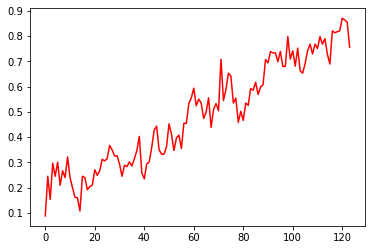

In [10]:
test_x_range=np.arange(1200,1412,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,predicted_results,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('temp value/c')
plt.legend()
plt.show()

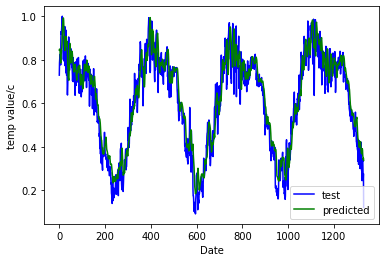

In [11]:
plt.plot(test_target,'b',label='test')
plt.plot(predicted_results,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('temp value/c')
plt.legend()
plt.show()